In [151]:
import queue
import random
import igraph

In [152]:
def single_vertex_bfs_with_paths_and_weights(s, g):
    # s is the integer index of the vertex that we are at
    # g is the graph in adjacency list format
    N = len(g)
    dists = [-1]*N
    dists[s] = 0
    # dists is a list (length N) of the known distances to each vertex
    weights = [0.]*N
    weights[s] = 1.
    # weights is a list (length N) of counts of the number of distinct 
    # backpaths from each vertex to s
    paths = [[]]*N
    # paths is a list (length N) of the lists of backpath edges toward s
    work = queue.Queue()
    work.put(s)
    orders = []
    while not work.empty():
        u = work.get()
        u_neighbors = g[u]
        for v in u_neighbors:
            if dists[v] < 0:  # we haven't visited this vertex before
                dists[v] = dists[u] + 1
                weights[v] = weights[u]
                work.put(v)
                orders = [v] + orders
                paths[v] = paths[v] + [u]
            else:             # we have visited this vertex before
                if dists[v] == dists[u] + 1:
                    paths[v] = paths[v] + [u]
                    weights[v] = weights[u] + weights[v]
    return [dists, paths, weights, orders]

def all_vertices_betweenness_centrality(g):
    N = len(g)
    final_scores = [0]*N
    for s in range(0,N):
        ret_vals = single_vertex_bfs_with_paths_and_weights(s, g)
        dists = ret_vals[0]
        paths = ret_vals[1]
        weights = ret_vals[2]
        orders = ret_vals[3]
        scores = [1]*N
        for v in orders:
            neighbors = paths[v]
            for neighbor in neighbors:
                ratio = weights[neighbor]/weights[v]
                scores[neighbor] = scores[neighbor] + scores[v]*ratio
        for u in range(0,N):
            final_scores[u] = final_scores[u] + scores[u]
    for s in range(0,N):
        final_scores[s] = (final_scores[s] - 2*N + 1)/2.0
    return final_scores

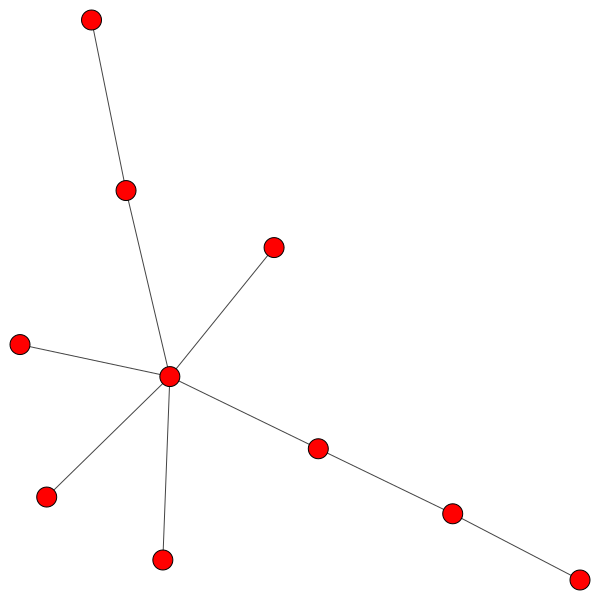

In [156]:
random.seed(1337)
g = igraph.Graph.Barabasi(10)   
g_adjlist = g.get_adjlist()
igraph.drawing.plot(g)

In [154]:
all_vertices_betweenness_centrality(g_adjlist)

[32.0, 14.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0]

In [155]:
g.betweenness(directed=False)

[32.0, 14.0, 0.0, 0.0, 8.0, 8.0, 0.0, 0.0, 0.0, 0.0]